# Task 3 - Unsupervised Machine Learning : K Means Clustering

In this clustering task, we are given ‘Iris’ dataset. We have to predict the optimum number of clusters and represent it visually.

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### **Reading the Dataset**

In [2]:
#Import Dataset
data = pd.read_csv(r'C:\Users\DELL\Desktop\Sparks Foundaton\Iris.csv')
print('Data imported successfully')

data.head(10)

Data imported successfully


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


### **Insights from Dataset**

In [3]:
#Data Summary
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
#Data Info & Structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [5]:
#Data Dimension
data.shape

(150, 6)

In [6]:
#Column Names
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
#Checking Missing Value
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### **Different Types of Plots**

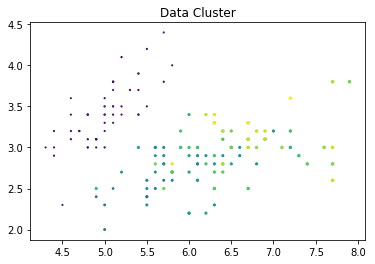

In [8]:
#Plotting the Data
plt.title('Data Cluster')
plt.scatter(data['SepalLengthCm'], data['SepalWidthCm'], data['PetalLengthCm'], data['PetalWidthCm'])

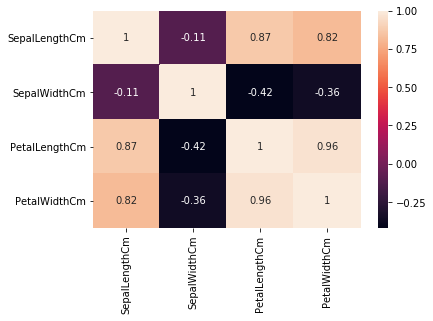

In [9]:
#Building Correlation Matrix
new_data = data.drop('Id', axis = 1)
sns.heatmap(new_data.corr(), annot = True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


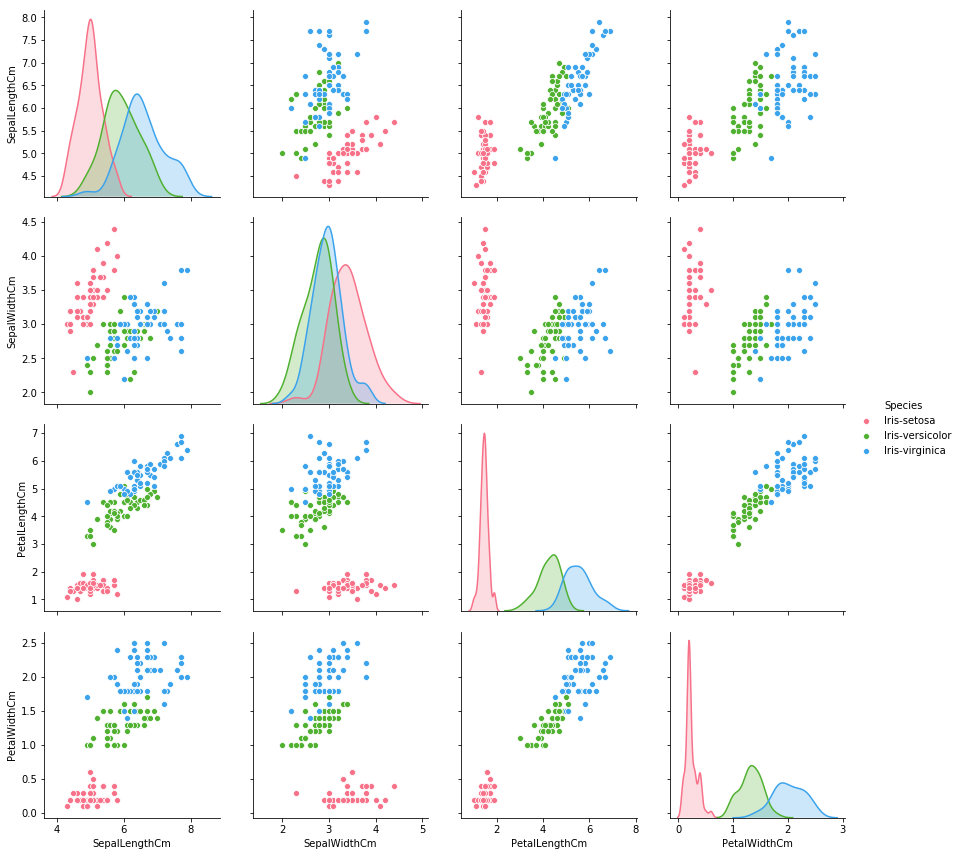

In [10]:
#Plotting Pair Plots
sns.pairplot(new_data, hue="Species", palette="husl", size=3, diag_kind="kde")

### **Training the Algorithm**

In [11]:
#Taking only Required Data 
x = data.iloc[:, [1, 2, 3, 4]].values

In [12]:
#Defining the kMeans Function with Initialization as k-means++ for Sepal Length & Sepal Width
from sklearn.cluster import KMeans
WCSS = []
for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster, init='k-means++', random_state = 0)
    kmeans.fit(x)
    WCSS.append(kmeans.inertia_)

WCSS    

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.31787321428571,
 46.56163015873016,
 38.930963049671746,
 34.19068792479662,
 30.063874432733137,
 27.84235606060606,
 26.04820224804436]

### **Elbow Curve - Determining the Number of Clusters**

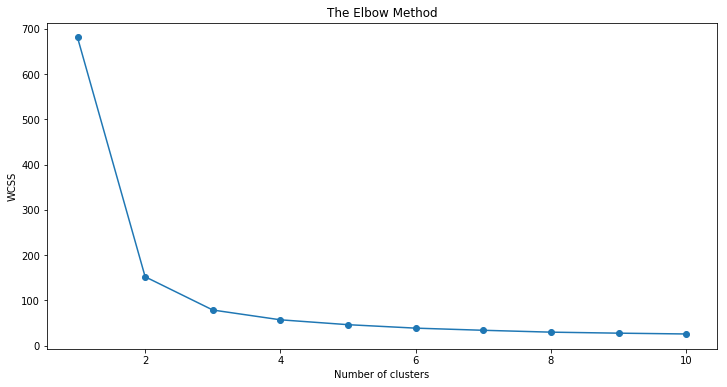

In [13]:
#Plotting the Elbow Curve to Determine the Number of Clusters
plt.figure(figsize=(12,6))
plt.plot(range(1,11), WCSS, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**From the above graph, we see that the elbow shape appears at 3. Hence, the optimum no. of clusters is '3'.**

### **Predicting**

In [14]:
#KMeans Using 3 Clusters and k-means++ Initialization
kmeans = KMeans(n_clusters = 3, init='k-means++', max_iter = 300, random_state = 0)
kmeans.fit(x)
pred = kmeans.predict(x)
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


### **Number of Observation in 3 Clusters**

In [15]:
#Number of Observations in each Cluster 
frame = pd.DataFrame(x)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    62
1    50
2    38
Name: cluster, dtype: int64

### **Visualization Of Clusters**

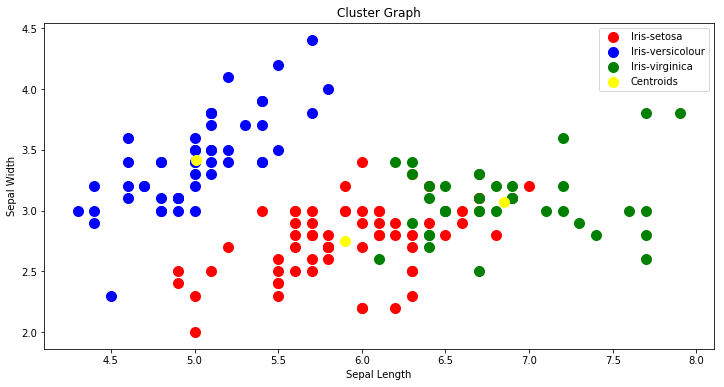

In [16]:
#Visualising the Clusters for Sepal Length and Sepal Width
plt.figure(figsize=(12,6))
plt.title('Cluster Graph')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.scatter(x[pred == 0, 0], x[pred == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')

plt.scatter(x[pred == 1, 0], x[pred == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')

plt.scatter(x[pred == 2, 0], x[pred == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

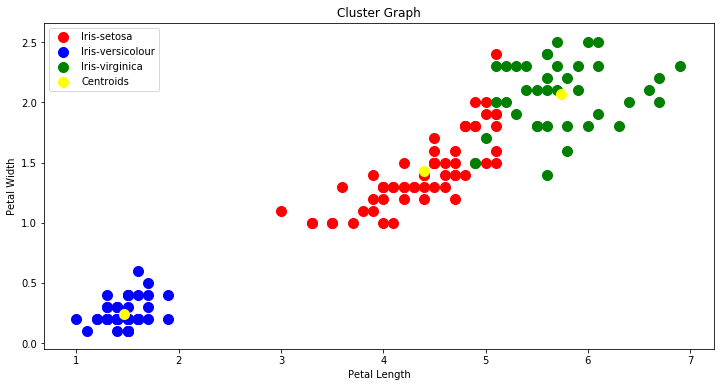

In [17]:
#Visualising the Clusters for Petal Length and Petal Width
plt.figure(figsize=(12,6))
plt.title('Cluster Graph')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.scatter(x[pred == 0, 2], x[pred == 0, 3], 
            s = 100, c = 'red', label = 'Iris-setosa')

plt.scatter(x[pred == 1, 2], x[pred == 1, 3], 
            s = 100, c = 'blue', label = 'Iris-versicolour')

plt.scatter(x[pred == 2, 2], x[pred == 2, 3],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()